# Colour - HDRI - Examples: Global Tonemapping Operators

This notebook showcases currently implemented Global Tonemapping Operators.

> Note: The global tonemapping operators are showcased with their default values which are not necessarily adapted to the test image.

- [Simple](#Simple)
- [Normalise](#Normalise)
- [Gamma](#Gamma)
- [Logarithmic](#Logarithmic)
- [Exponential](#Exponential)
- [Logarithmic Mapping](#Logarithmic-Mapping)
- [Exponentiation Mapping](#Exponentiation-Mapping)
- [Schlick (1994)](#Schlick-%281994%29)
- [Tumblin (1999)](#Tumblin-%281999%29)
- [Reinhard (2004)](#Reinhard-%282004%29)
- [Filmic](#Filmic)

## Utilities

In [1]:
from __future__ import division

import ipywidgets as widgets
import numpy as np
import os

import colour
from colour.plotting import *

from colour_hdri import (
    EXAMPLES_RESOURCES_DIRECTORY,
    tonemapping_operator_simple,
    tonemapping_operator_normalisation,
    tonemapping_operator_gamma,
    tonemapping_operator_logarithmic,
    tonemapping_operator_exponential,
    tonemapping_operator_logarithmic_mapping,
    tonemapping_operator_exponentiation_mapping,
    tonemapping_operator_Schlick1994,
    tonemapping_operator_Tumblin1999,
    tonemapping_operator_Reinhard2004,
    tonemapping_operator_filmic)
from colour_hdri.plotting import plot_tonemapping_operator_image

RESOURCES_DIRECTORY = os.path.join(EXAMPLES_RESOURCES_DIRECTORY,
                                   'radiance')

colour.utilities.filter_warnings()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.7.4 (default, Sep  7 2019, 18:27:02)                       *
*                [Clang 10.0.1 (clang-1001.0.46.4)]                           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.14                                                       *
*       colour-hdri : v0.1.5-60-g9648d86                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.6.1                                                       *
*       matplotlib : 3.0.3                                                    *
*       numpy : 1.17.3                  

In [2]:
colour_style();

## Data

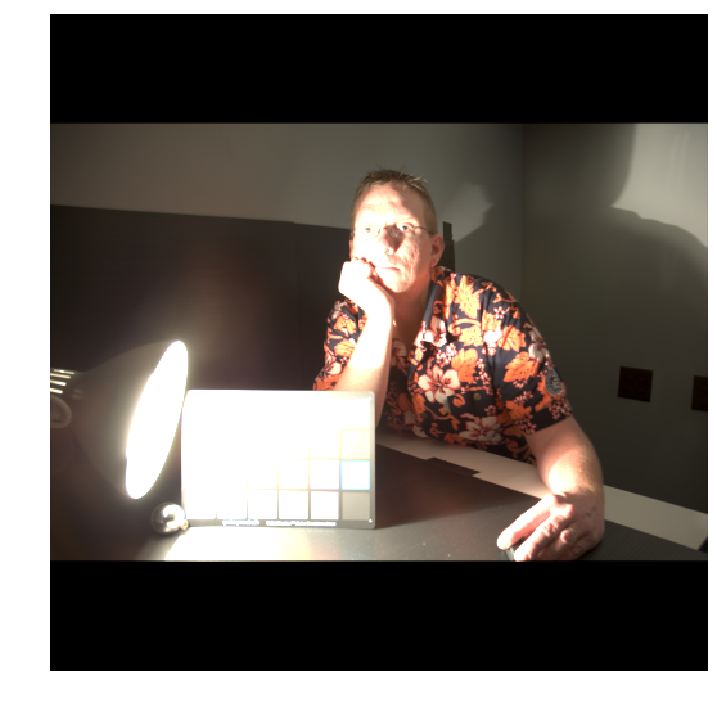

In [3]:
HDRI_IMAGE = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'HDRMark_small.hdr'))

SAMPLES = np.linspace(0, 1, 512)
D_SAMPLES = np.dstack((SAMPLES, SAMPLES, SAMPLES))

plot_image(colour.cctf_encoding(HDRI_IMAGE));

## Simple

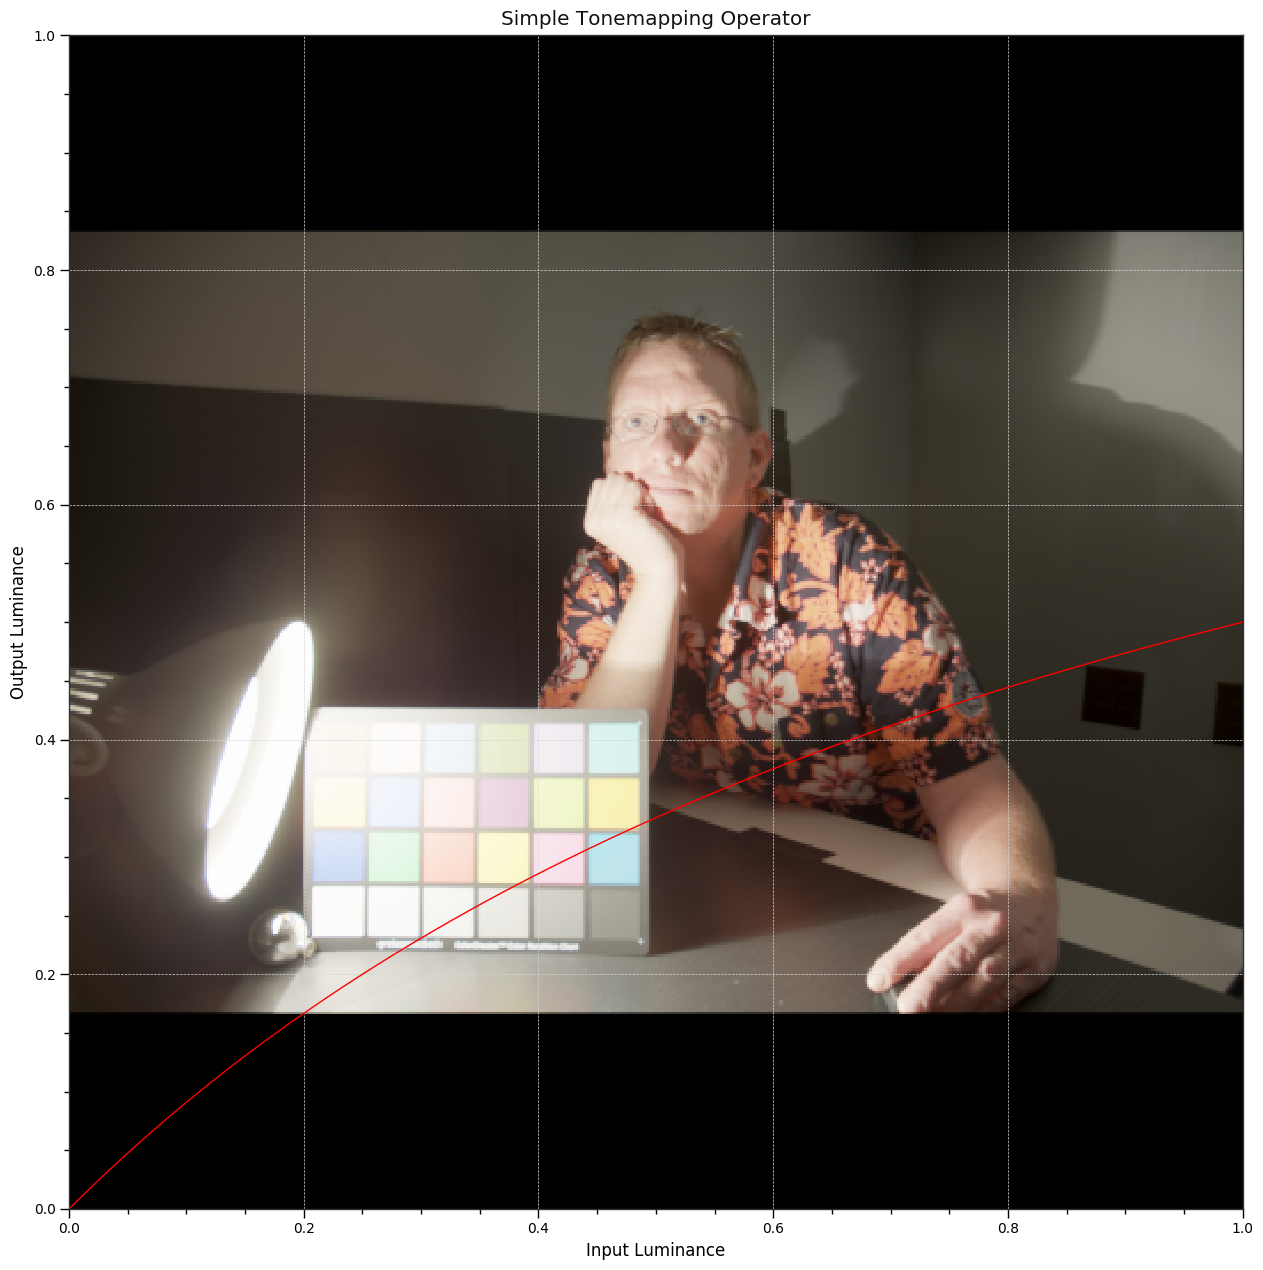

In [4]:
plot_tonemapping_operator_image(
    tonemapping_operator_simple(HDRI_IMAGE),
    tonemapping_operator_simple(SAMPLES),
    title='Simple Tonemapping Operator');

## Normalisation

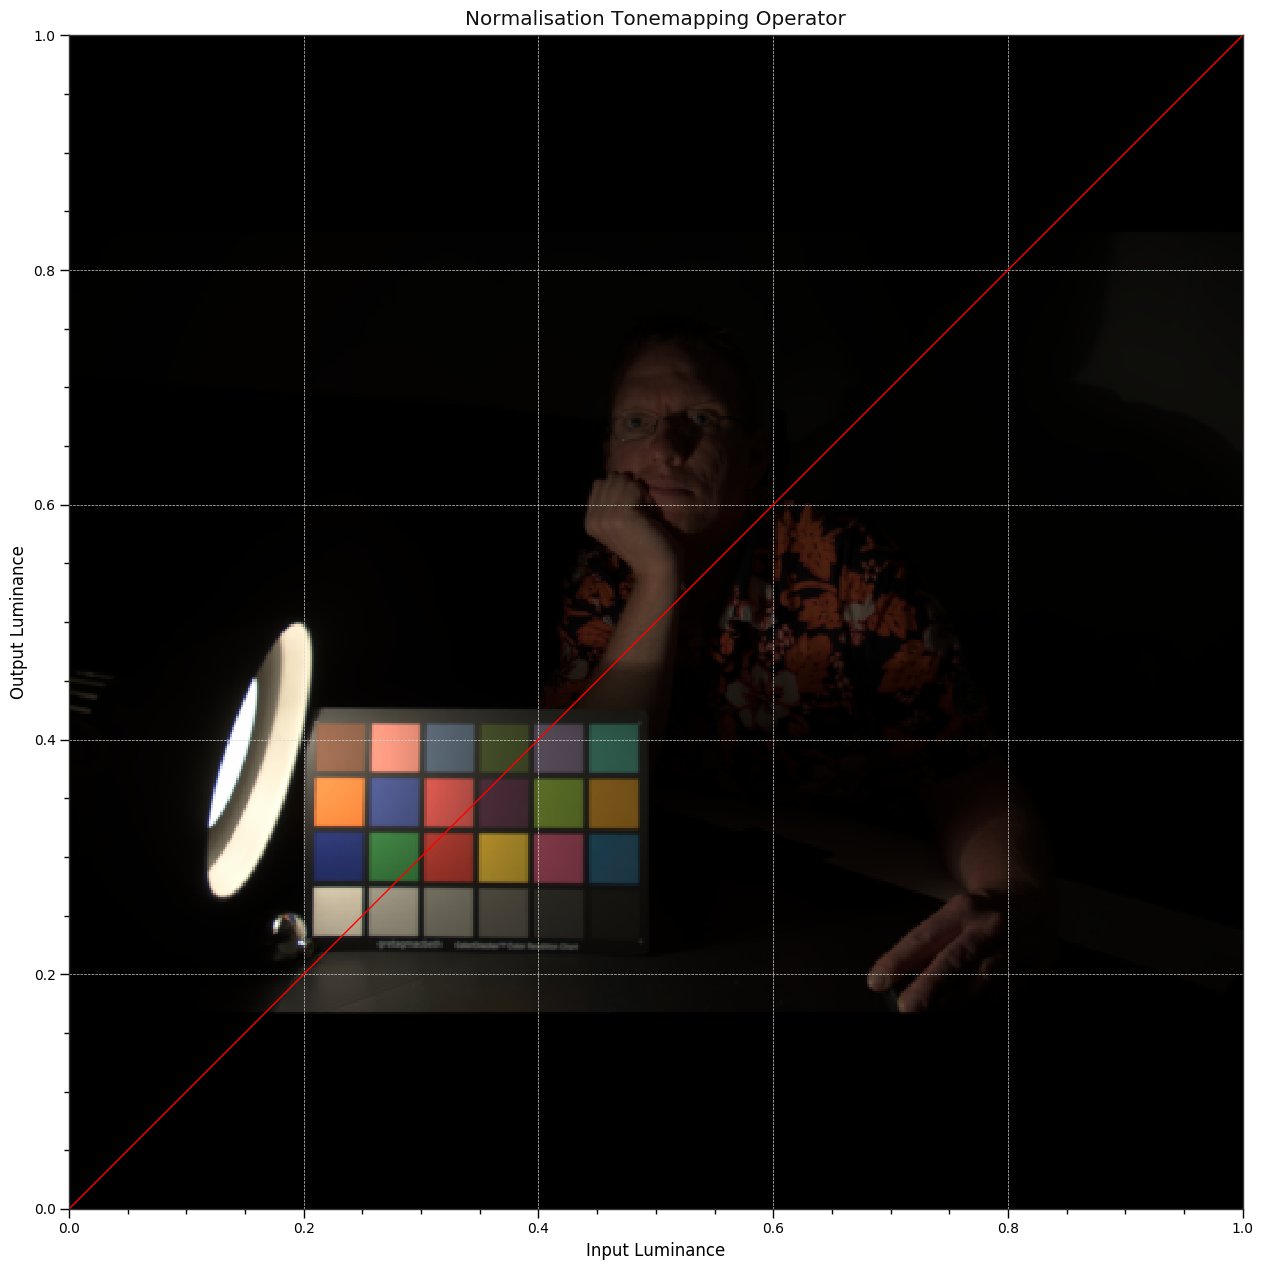

In [5]:
plot_tonemapping_operator_image(
    tonemapping_operator_normalisation(HDRI_IMAGE),
    np.squeeze(tonemapping_operator_normalisation(D_SAMPLES)[..., 0]),
    title='Normalisation Tonemapping Operator');

## Gamma

In [6]:
def tonemapping_operator_gamma_interactive(image, gamma=1, f_stop=0):
    plot_tonemapping_operator_image(
        tonemapping_operator_gamma(image, gamma, f_stop),
        tonemapping_operator_gamma(SAMPLES, gamma, f_stop),
        title='Gamma Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_gamma_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    gamma=(0.1, 3, 0.1),
    f_stop=(-10, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='gamma', max=3.0, min=0.1), FloatSlider(value=0.0, de…

## Logarithmic

In [7]:
def tonemapping_operator_logarithmic_interactive(image, q=1, k=1):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_logarithmic(image, q, k),
            np.squeeze(tonemapping_operator_logarithmic(
                D_SAMPLES, q, k)[..., 0]),
            title='Logarithmic Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_logarithmic_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    q=(1, 100, 0.1),
    k=(1, 100, 0.1))

interactive(children=(FloatSlider(value=1.0, description='q', min=1.0), FloatSlider(value=1.0, description='k'…

## Exponential

In [8]:
def tonemapping_operator_exponential_interactive(image, q=1, k=1):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_exponential(image, q, k),
            np.squeeze(tonemapping_operator_exponential(
                D_SAMPLES, q, k)[..., 0]),
            title='Exponential Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_exponential_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    q=(1, 100, 1),
    k=(1, 10000, 1))

interactive(children=(IntSlider(value=1, description='q', min=1), IntSlider(value=1, description='k', max=1000…

## Logarithmic Mapping

In [9]:
def tonemapping_operator_logarithmic_mapping_interactive(image,
                                                         p=1,
                                                         q=1):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_logarithmic_mapping(image, p, q),
            np.squeeze(tonemapping_operator_logarithmic_mapping(
                D_SAMPLES, p, q)
            [..., 0]),
            title='Logarithmic Mapping Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_logarithmic_mapping_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    p=(0.1, 100, 0.01),
    q=(1, 3, 0.01))

interactive(children=(FloatSlider(value=1.0, description='p', min=0.1, step=0.01), FloatSlider(value=1.0, desc…

## Exponentiation Mapping

In [10]:
def tonemapping_operator_exponentiation_mapping_interactive(image,
                                                            p=1,
                                                            q=1):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_exponentiation_mapping(image, p, q),
            np.squeeze(tonemapping_operator_exponential(
                D_SAMPLES, p, q)[..., 0]),
            title='Exponentiation Mapping Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_exponentiation_mapping_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    p=(0, 1, 0.01),
    q=(1, 3, 0.01))

interactive(children=(FloatSlider(value=1.0, description='p', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

## Schlick (1994)

In [11]:
def tonemapping_operator_Schlick1994_interactive(image,
                                                 p=1):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_Schlick1994(image, p),
            np.squeeze(tonemapping_operator_Schlick1994(
                D_SAMPLES, p)[..., 0]),
            title='Schlick (1994) Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_Schlick1994_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    p=(1, 100, 0.1))

interactive(children=(FloatSlider(value=1.0, description='p', min=1.0), Output()), _dom_classes=('widget-inter…

## Tumblin (1999)

In [12]:
def tonemapping_operator_Tumblin1999_interactive(image,
                                                 L_da=20,
                                                 C_max=100,
                                                 L_max=100):
    with colour.utilities.suppress_warnings(python_warnings=True):
        plot_tonemapping_operator_image(
            tonemapping_operator_Tumblin1999(
                image, L_da, C_max, L_max),
            np.squeeze(tonemapping_operator_Tumblin1999(
                D_SAMPLES, L_da, C_max, L_max)[..., 0]),
            title='Tumblin (1999) Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_Tumblin1999_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    L_da=(20, 30, 1),
    C_max=(30, 100, 1),
    L_max=(30, 100, 1))

interactive(children=(IntSlider(value=20, description='L_da', max=30, min=20), IntSlider(value=100, descriptio…

## Reinhard (2004)

In [13]:
def tonemapping_operator_Reinhard2004_interactive(image,
                                                  f=0,
                                                  m=0.3,
                                                  a=0,
                                                  c=0):
    plot_tonemapping_operator_image(
        tonemapping_operator_Reinhard2004(image, f, m, a, c),
        np.squeeze(tonemapping_operator_Reinhard2004(D_SAMPLES,
                                                     f,
                                                     m,
                                                     a,
                                                     c)[..., 0]),
        title='Reinhard (2004) Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_Reinhard2004_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    f=(-20, 20, 0.1),
    m=(-1, 1, 0.01),
    a=(0, 1, 0.01),
    c=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.0, description='f', max=20.0, min=-20.0), FloatSlider(value=0.3, des…

## Filmic

In [14]:
def tonemapping_operator_filmic_interactive(image,
                                            shoulder_strength=0.22,
                                            linear_strength=0.3,
                                            linear_angle=0.1,
                                            toe_strength=0.2,
                                            toe_numerator=0.01,
                                            toe_denominator=0.3,
                                            exposure_bias=2):
    args = (shoulder_strength,
            linear_strength,
            linear_angle,
            toe_strength,
            toe_numerator,
            toe_denominator,
            exposure_bias)

    plot_tonemapping_operator_image(
        tonemapping_operator_filmic(image, *args),
        np.squeeze(tonemapping_operator_filmic(D_SAMPLES, *args)[..., 0]),
        title='Filmic Tonemapping Operator')


widgets.interactive(
    tonemapping_operator_filmic_interactive,
    image=widgets.fixed(HDRI_IMAGE),
    shoulder_strength=(0, 1, 0.01),
    linear_strength=(0, 1, 0.01),
    linear_angle=(0, 1, 0.01),
    toe_strength=(0, 1, 0.01),
    toe_numerator=(0, 1, 0.001),
    toe_denominator=(0, 1, 0.01),
    exposure_bias=(0, 10, 0.1))

interactive(children=(FloatSlider(value=0.22, description='shoulder_strength', max=1.0, step=0.01), FloatSlide…